In [1]:
import missingno as msno
import pandas as pd
import os
print(os.getcwd())
os.chdir('d:\\vscode_machineLearning\\BEST_PROJECTS\\ForbesBillionaires')
print(os.getcwd())

d:\vscode_machineLearning\BEST_PROJECTS\ForbesBillionaires\experiments
d:\vscode_machineLearning\BEST_PROJECTS\ForbesBillionaires


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'artifacts/ForbesBillionaires-dataset/all_billionaires_1997_2023.csv')

In [4]:
df.sample(20)

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
12501,2015,3,949.0,2.0 B,Karim,Bachtiar,Bachtiar Karim & family,1957-01-01,58.0,Male,Indonesia,Indonesia,Medan,Manufacturing,['Manufacturing'],NaN,NaN,False,Remained Even
24145,2021,4,476.0,5.8 B,Chan,Laiwa,Chan Laiwa & family,1941-01-01,80.0,Female,China,China,Beijing,Real Estate,['Real Estate'],NaN,Philanthropist,True,Remained Even
6384,2011,3,347.0,3.2 B,Rales,Steven,Steven Rales,1951-03-31,59.0,Male,United States,United States,Washington,Service,['Service'],Danaher,Chairman,True,Increased
9206,2013,3,736.0,2.0 B,Benetton,Luciano,Luciano Benetton,1935-05-13,77.0,Male,Italy,Italy,Treviso,Fashion & Retail,['Fashion & Retail'],NaN,Entrepreneur,True,Decreased
20316,2019,3,877.0,2.6 B,Lohia,Aloke,Aloke Lohia,1958-11-27,60.0,Male,India,Thailand,Bangkok,Manufacturing,['Manufacturing'],NaN,NaN,False,Decreased
868,2003,3,236.0,1.7 B,Huizenga,H. Wayne,H. Wayne Huizenga,1937-12-29,65.0,Male,United States,United States,Fort Lauderdale,NaN,['Investments'],NaN,NaN,False,Decreased
23301,2020,4,1613.0,1.3 B,Zhu,Yiming,Zhu Yiming,1972-07-01,47.0,Male,China,China,Beijing,Technology,['Technology'],NaN,NaN,True,NaN
30260,2023,4,1164.0,2.6 B,Batista,Wesley,Wesley Batista,1972-12-08,50.0,Male,Brazil,Brazil,Sao Paulo,Food & Beverage,['Food & Beverage'],NaN,NaN,False,Decreased
11048,2014,3,1154.0,1.5 B,Chen,Yung-Tai,Chen Yung-Tai,1936-01-01,78.0,Male,Taiwan,Taiwan,Taipei,Real Estate,['Real Estate'],NaN,NaN,True,Increased
16930,2017,3,1678.0,1.2 B,Singh,Analjit,Analjit Singh,1954-01-11,63.0,Male,India,India,Delhi,Healthcare,['Healthcare'],NaN,NaN,False,NaN


<Axes: >

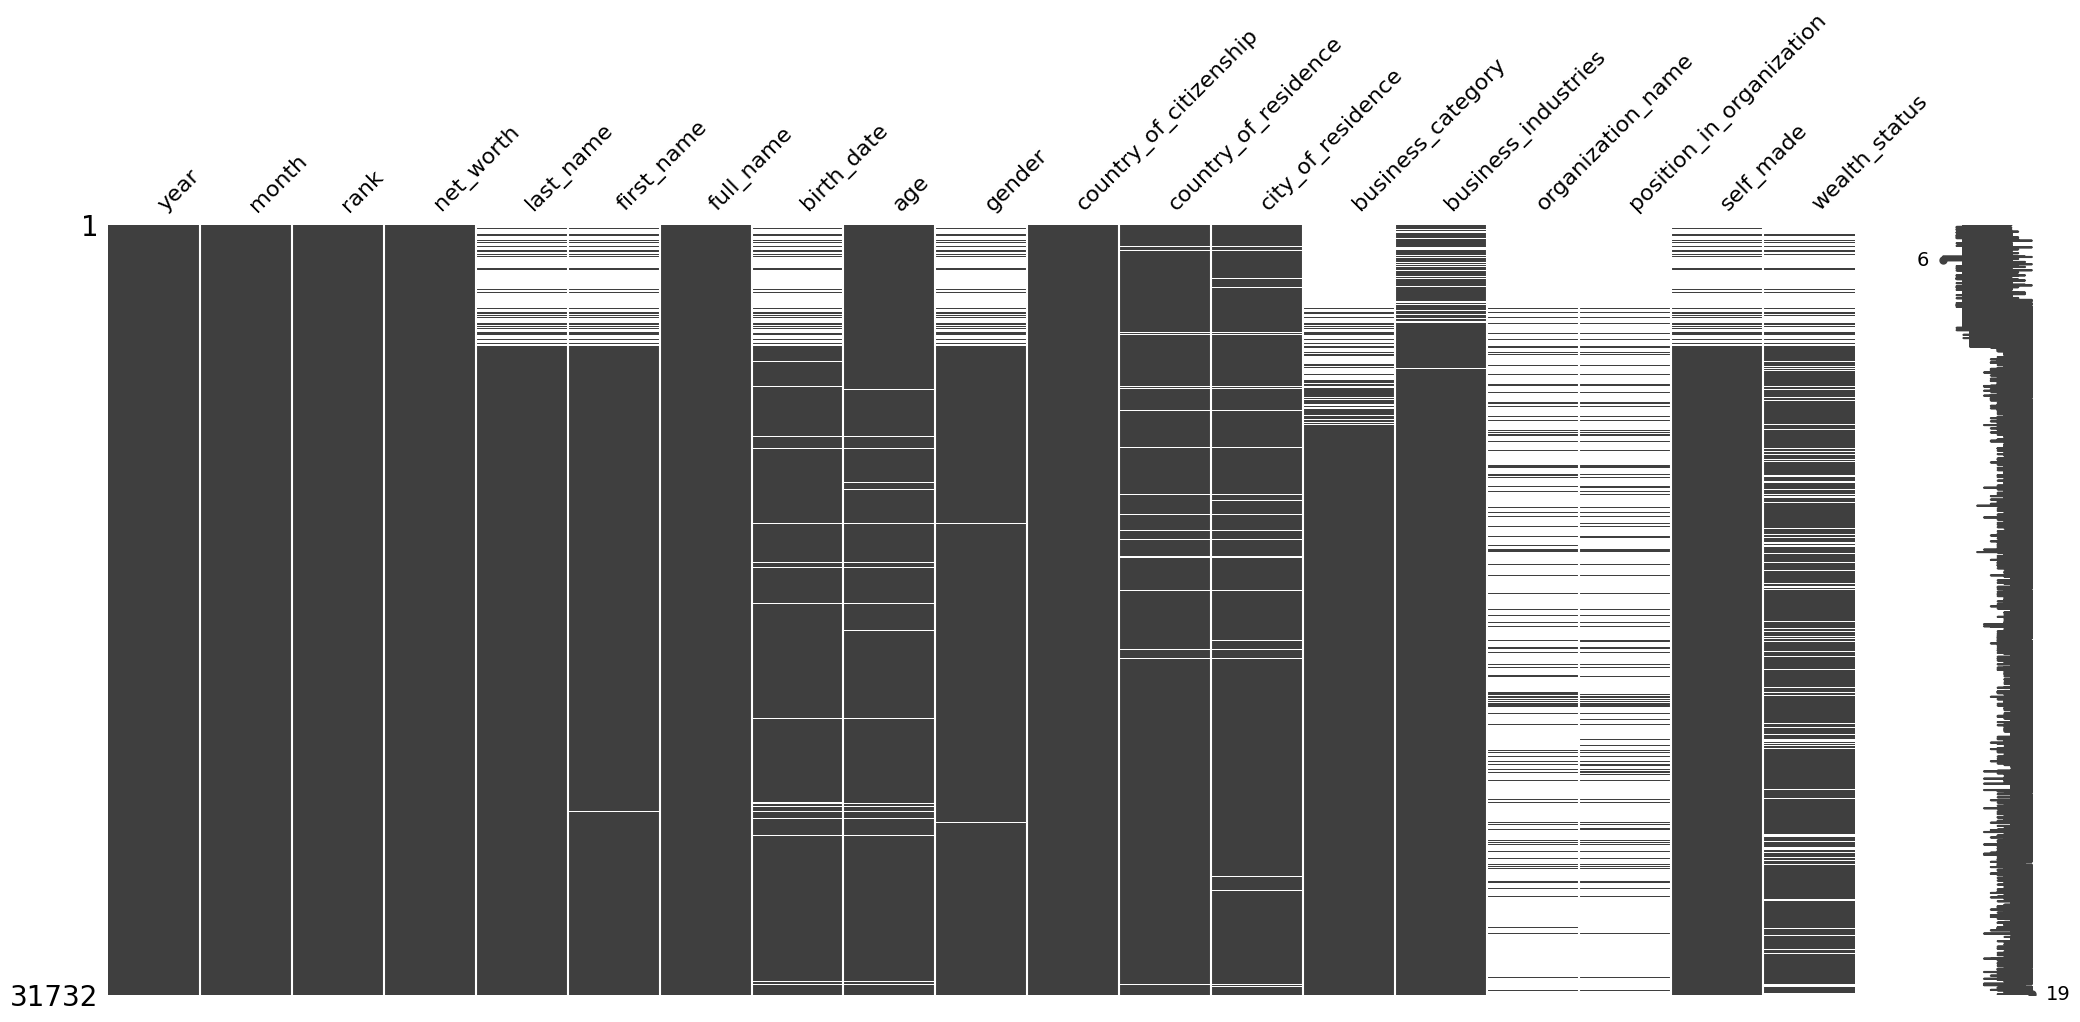

In [5]:
msno.matrix(df)

In [6]:
df['net_worth'] = df['net_worth'].str.replace('B','').str.strip().astype(float)
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['birth_date_month'] = df['birth_date'].dt.month
df['birth_date_year'] = df['birth_date'].dt.year
df['birth_date_month_name'] = df['birth_date'].dt.strftime('%B')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31732 entries, 0 to 31731
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   year                      31732 non-null  int64         
 1   month                     31732 non-null  int64         
 2   rank                      31714 non-null  float64       
 3   net_worth                 31732 non-null  float64       
 4   last_name                 28043 non-null  object        
 5   first_name                27985 non-null  object        
 6   full_name                 31732 non-null  object        
 7   birth_date                27328 non-null  datetime64[ns]
 8   age                       31057 non-null  float64       
 9   gender                    27903 non-null  object        
 10  country_of_citizenship    31723 non-null  object        
 11  country_of_residence      31030 non-null  object        
 12  city_of_residence 

## Month does not affect net worth.

d:\vscode_machineLearning\BEST_PROJECTS\ForbesBillionaires\forbesvenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


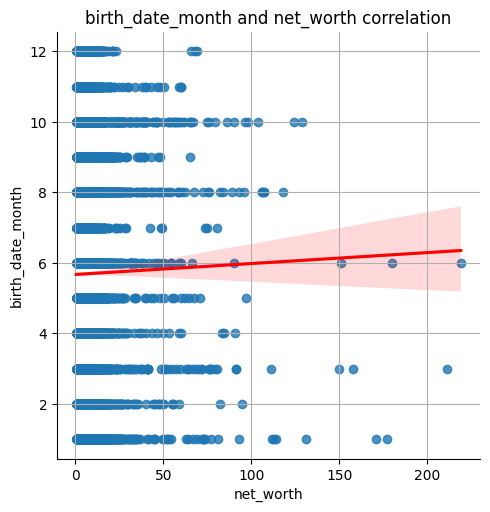

In [7]:
sns.lmplot(data = df, x='net_worth', y='birth_date_month', line_kws={'color': 'red'})
plt.grid(True)
plt.title('birth_date_month and net_worth correlation')
plt.show()

d:\vscode_machineLearning\BEST_PROJECTS\ForbesBillionaires\forbesvenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

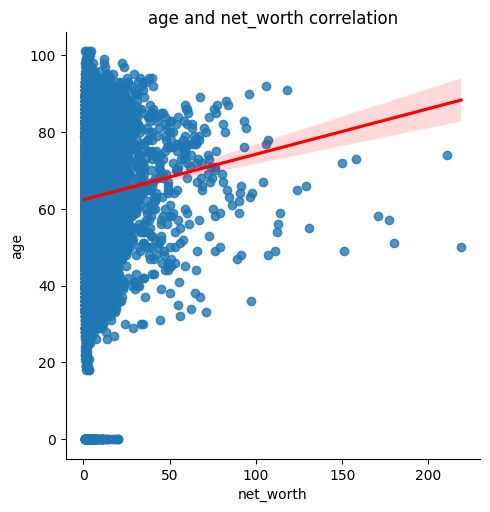

In [8]:
plt.figure(figsize=(10,6))
sns.lmplot(data = df, x='net_worth', y='age', line_kws={'color': 'red'})
# plt.grid(True)
plt.title('age and net_worth correlation')
plt.show()

d:\vscode_machineLearning\BEST_PROJECTS\ForbesBillionaires\forbesvenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


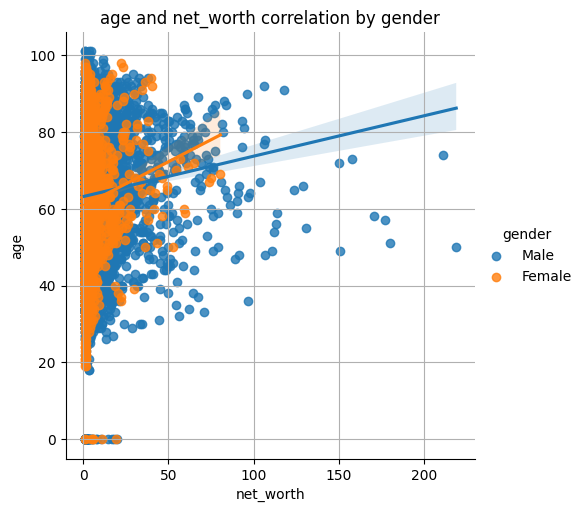

In [9]:
sns.lmplot(data = df, x='net_worth', y='age', hue='gender')
plt.grid(True)
plt.title('age and net_worth correlation by gender')
plt.show()

In [10]:
df[df['age'] > 0].sort_values(by='age',ascending=True)

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,...,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status,birth_date_month,birth_date_year,birth_date_month_name
24609,2021,4,925.0,3.3,Lehmann,Kevin David,Kevin David Lehmann,2002-09-01,18.0,Male,...,NaN,Fashion & Retail,['Fashion & Retail'],NaN,NaN,False,NaN,9.0,2002.0,September
595,2002,3,327.0,1.4,NaN,NaN,Albert von Thurn und Taxis,NaT,18.0,NaN,...,Regensburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29915,2023,4,818.0,3.5,Del Vecchio,Clemente,Clemente Del Vecchio,2004-05-06,18.0,Male,...,Milan,Fashion & Retail,['Fashion & Retail'],NaN,NaN,False,NaN,5.0,2004.0,May
30847,2023,4,1725.0,1.7,Kim,Jung-youn,Kim Jung-youn,2004-01-01,19.0,Female,...,NaN,Media & Entertainment,['Media & Entertainment'],NaN,NaN,False,NaN,1.0,2004.0,January
14839,2016,3,1476.0,1.2,Andresen,Alexandra,Alexandra Andresen,1996-07-23,19.0,Female,...,Oslo,Diversified,['Diversified'],NaN,NaN,False,NaN,7.0,1996.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20540,2019,3,1116.0,2.1,Chang,Yun Chung,Chang Yun Chung,1918-08-27,100.0,Male,...,Singapore,Logistics,['Logistics'],NaN,NaN,True,Increased,8.0,1918.0,August
31272,2023,4,2133.0,1.3,Joseph,George,George Joseph,1921-09-11,101.0,Male,...,Los Angeles,Finance & Investments,['Finance & Investments'],NaN,NaN,True,Decreased,9.0,1921.0,September
15767,2017,3,581.0,3.3,Rockefeller,David,"David Rockefeller, Sr.",1915-06-12,101.0,Male,...,NaN,Finance and Investments,['Finance and Investments'],NaN,Philanthropist,False,Increased,6.0,1915.0,June
23438,2020,4,1851.0,1.1,Chang,Yun Chung,Chang Yun Chung,1918-08-27,101.0,Male,...,Singapore,Logistics,['Logistics'],NaN,NaN,True,Decreased,8.0,1918.0,August


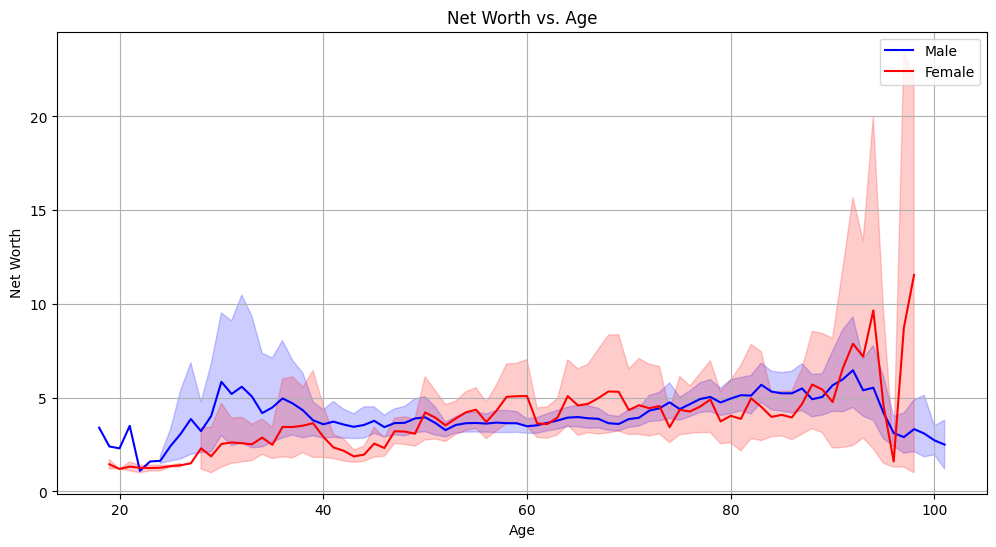

In [11]:
filtered_df = df[df['age'] > 0].sort_values('age', ascending=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='net_worth', hue='gender', data=filtered_df, palette={'Male': 'blue', 'Female': 'red'})

plt.title('Net Worth vs. Age')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.legend()
plt.grid(True)
plt.show()

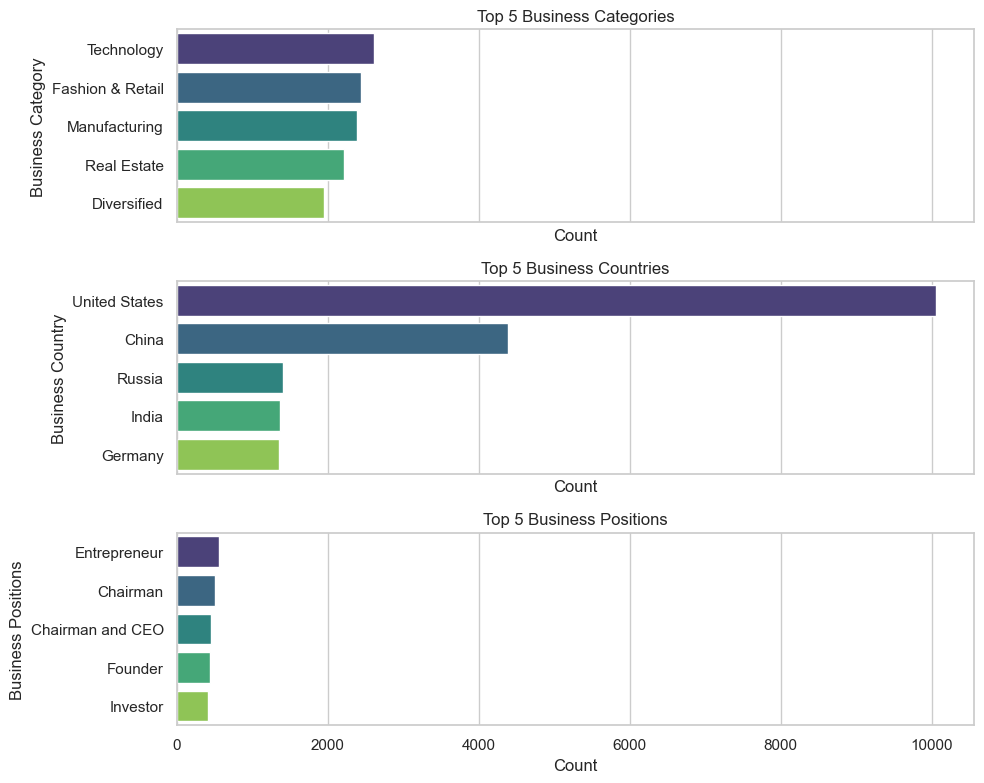

In [12]:
top_categories = df['business_category'].value_counts().head(5)
top_countries = df['country_of_residence'].value_counts().head(5)
top_positions = df['position_in_organization'].value_counts().head(5)

sns.set(style="whitegrid")


fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


sns.barplot(ax=axes[0], x=top_categories.values, y=top_categories.index, palette="viridis")
axes[0].set_title('Top 5 Business Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Business Category')

sns.barplot(ax=axes[1], x=top_countries.values, y=top_countries.index, palette="viridis")
axes[1].set_title('Top 5 Business Countries')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Business Country')

sns.barplot(ax=axes[2], x=top_positions.values, y=top_positions.index, palette="viridis")
axes[2].set_title('Top 5 Business Positions')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Business Positions')

plt.tight_layout()

plt.show()



In [13]:
df['year'].value_counts()

year
2021    2755
2022    2668
2023    2640
2018    2208
2019    2153
2020    2095
2017    2043
2015    1826
2016    1811
2014    1645
2013    1426
2012    1226
2011    1209
2010    1011
2008     908
2007     761
2009     738
2006     628
2005     530
2004     432
2001     335
2002     333
2003     332
2000       8
1999       8
1997       2
1998       1
Name: count, dtype: int64

In [14]:
df.groupby('year').head()

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,...,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status,birth_date_month,birth_date_year,birth_date_month_name
0,1997,7,NaN,2.0,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,...,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN,2.0,1934.0,February
1,1997,7,NaN,1.8,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,...,NaN,NaN,NaN,NaN,NaN,False,NaN,12.0,1927.0,December
2,1998,7,NaN,3.3,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,...,NaN,NaN,NaN,NaN,NaN,True,NaN,8.0,1932.0,August
3,1999,7,NaN,1.0,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,...,London,NaN,NaN,NaN,NaN,False,NaN,11.0,1935.0,November
4,1999,7,NaN,7.1,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,...,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN,9.0,1939.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29092,2023,4,1.0,211.0,Arnault,Bernard,Bernard Arnault & family,1949-03-05,74.0,Male,...,Paris,Fashion & Retail,['Fashion & Retail'],LVMH Moët Hennessy Louis Vuitton,Chairman and CEO,False,Increased,3.0,1949.0,March
29093,2023,4,2.0,180.0,Musk,Elon,Elon Musk,1971-06-28,51.0,Male,...,Austin,Automotive,['Automotive'],Tesla,CEO,True,Decreased,6.0,1971.0,June
29094,2023,4,3.0,114.0,Bezos,Jeff,Jeff Bezos,1964-01-12,59.0,Male,...,Medina,Technology,['Technology'],Amazon,Chairman and Founder,True,Decreased,1.0,1964.0,January
29095,2023,4,4.0,107.0,Ellison,Larry,Larry Ellison,1944-08-17,78.0,Male,...,Lanai,Technology,['Technology'],Oracle,CTO and Founder,True,Increased,8.0,1944.0,August


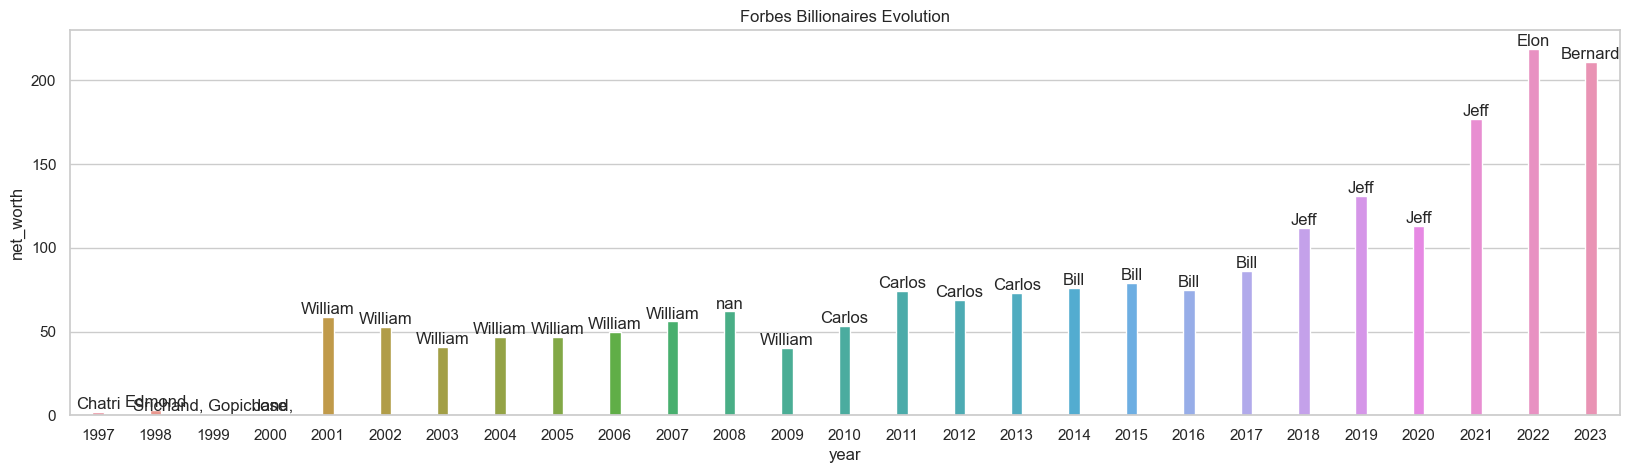

In [15]:
#dataset.sort_values(by='net_worth',ascending=False,inplace=True)
groupby_obj = df.groupby('year').head(1)[['year','first_name','net_worth']].sort_values(by='year')
#groupby_obj['net_worth'] = groupby_obj['net_worth'].str.replace('B',"").astype(float)
fig= plt.figure(figsize=(20,5))
ax = sns.barplot(data=groupby_obj,x='year',y='net_worth',width=0.2)
ax.bar_label(ax.containers[0],groupby_obj['first_name'], fmt='%.1f')
plt.title("Forbes Billionaires Evolution")
plt.show()

In [16]:
import plotly.express as px

In [54]:
df['rank'].value_counts()

rank
1818.0    234
1415.0    183
1513.0    166
2524.0    150
1929.0    147
         ... 
781.0       1
526.0       1
1152.0      1
1711.0      1
0.0         1
Name: count, Length: 840, dtype: int64

1. `import plotly.express as px`: This imports the Plotly Express library, often abbreviated as `px`, which provides a simplified interface for creating interactive visualizations.

2. `fig = px.bar(...)`: This line creates a bar chart using Plotly Express. The data for the chart is derived from a DataFrame called `df`.

   - `df.groupby('year').head(10)`: This groups the DataFrame `df` by the 'year' column and then selects the top 10 rows within each group. This implies that the DataFrame contains information about billionaires over different years.

   - `x='net_worth'`: The 'net_worth' column is used for the x-axis (horizontal axis) of the bar chart. It represents the net worth of the billionaires.

   - `y='rank'`: The 'rank' column is used for the y-axis (vertical axis) of the bar chart. It represents the ranking of the billionaires.

   - `range_x=[1, 230]`: This sets the range of the x-axis from 1 to 230.

   - `range_y=[0, 12]`: This sets the range of the y-axis from 0 to 12.

   - `orientation='h'`: This specifies that the bars should be horizontally oriented.

   - `animation_frame="year"`: This creates an animation by showing the data for each year in a sequence.

   - `text=df.groupby('year').head(10)['full_name']`: The 'full_name' column is used to provide text labels for each bar.

3. `fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500`: This line sets the duration (in milliseconds) for each frame in the animation.

4. `fig.update_layout(...)`: This updates the layout of the chart with various settings:

   - `title="Top 10 Forbes Billionaires Over Years"`: Sets the title of the chart.

   - `height=500, width=1000`: Sets the height and width of the chart.

   - `margin={"r": 0, "t": 50, "l": 0, "b": 0}`: Sets the margins around the chart area, with different values for the right, top, left, and bottom sides.

5. `fig.update_yaxes(autorange="reversed")`: This reverses the y-axis to have the highest rank at the top of the chart.

6. `fig.show()`: This line displays the animated bar chart in the output. It's important to note that this line is required to actually visualize the chart.


In [20]:
fig = px.bar(df.groupby('year').head(10),x='net_worth',y='rank', range_x=[1,230],range_y=[0,12],orientation='h',animation_frame="year",text=df.groupby('year').head(10)['full_name'])
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
fig.update_layout(title="Top 10 Forbes Billionaires Over Years",height=500,width=1000, margin={"r":0,"t":50,"l":0,"b":0})
#fig.update_yaxes(visible=False, showticklabels=False)
fig.update_yaxes(autorange="reversed")
fig.show()


In [24]:
df

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,...,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status,birth_date_month,birth_date_year,birth_date_month_name
0,1997,7,NaN,2.0,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,...,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN,2.0,1934.0,February
1,1997,7,NaN,1.8,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,...,NaN,NaN,NaN,NaN,NaN,False,NaN,12.0,1927.0,December
2,1998,7,NaN,3.3,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,...,NaN,NaN,NaN,NaN,NaN,True,NaN,8.0,1932.0,August
3,1999,7,NaN,1.0,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,...,London,NaN,NaN,NaN,NaN,False,NaN,11.0,1935.0,November
4,1999,7,NaN,7.1,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,...,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN,9.0,1939.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31727,2023,4,2540.0,1.0,Yu,Rong,Yu Rong,1971-12-14,51.0,Male,...,Shanghai,Healthcare,['Healthcare'],NaN,NaN,True,Decreased,12.0,1971.0,December
31728,2023,4,2540.0,1.0,Yuengling,Richard,"Richard Yuengling, Jr.",1943-03-10,80.0,Male,...,Pottsville,Food & Beverage,['Food & Beverage'],NaN,NaN,False,Remained Even,3.0,1943.0,March
31729,2023,4,2540.0,1.0,Zhang,Gongyun,Zhang Gongyun,1962-12-18,60.0,Male,...,Gaomi,Manufacturing,['Manufacturing'],NaN,NaN,True,Returned to List,12.0,1962.0,December
31730,2023,4,2540.0,1.0,Zhang,Guiping,Zhang Guiping & family,1951-08-21,71.0,Male,...,Nanjing,Real Estate,['Real Estate'],NaN,NaN,True,Decreased,8.0,1951.0,August


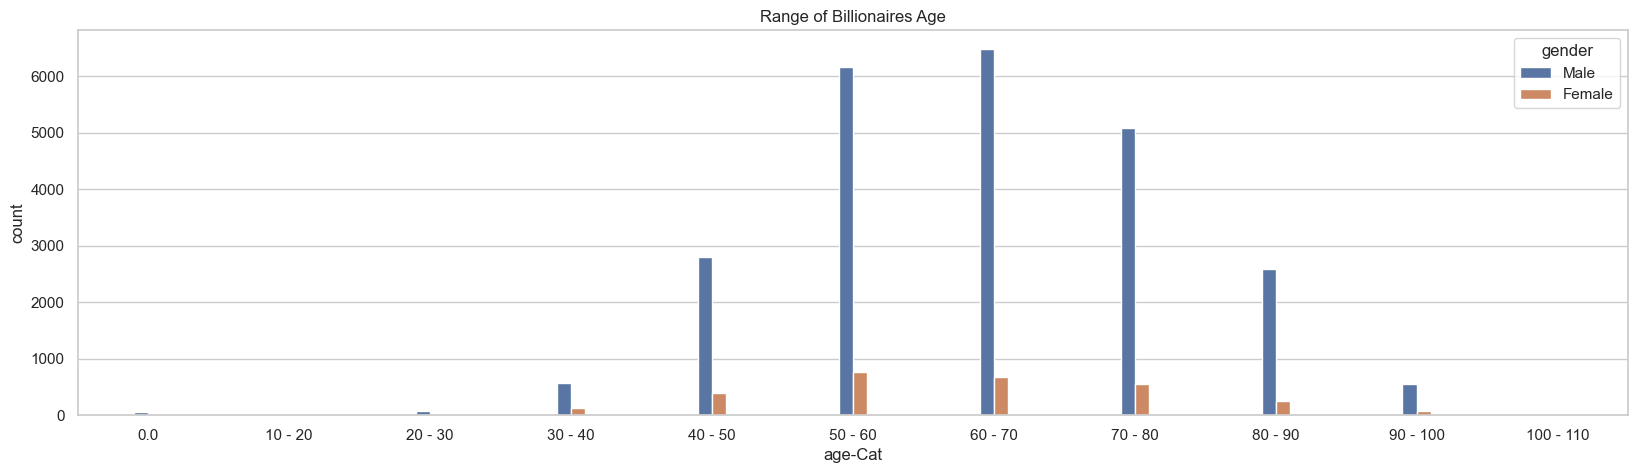

In [25]:
df["age-Cat"] =df["age"].apply(lambda x: f"{int(x/10)*10} - {(int(x/10)*10)+10}" if x>0  else x)

fig= plt.figure(figsize=(20,5))
ax = sns.countplot(data=df.sort_values(by='age'),x='age-Cat',hue='gender',width=0.2)
plt.title("Range of Billionaires Age")
plt.show()

In [41]:
df.columns

Index(['year', 'month', 'rank', 'net_worth', 'last_name', 'first_name',
       'full_name', 'birth_date', 'age', 'gender', 'country_of_citizenship',
       'country_of_residence', 'city_of_residence', 'business_category',
       'business_industries', 'organization_name', 'position_in_organization',
       'self_made', 'wealth_status', 'birth_date_month', 'birth_date_year',
       'birth_date_month_name', 'age-Cat'],
      dtype='object')

In [32]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

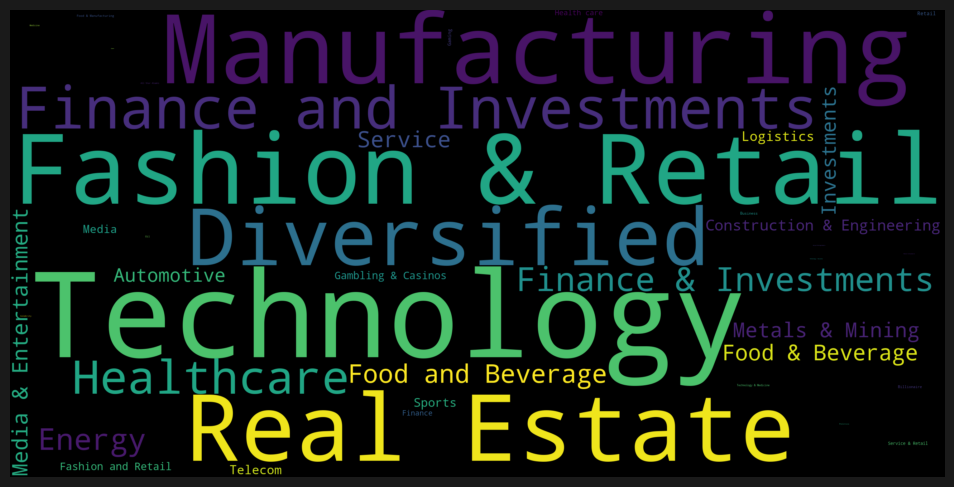

In [38]:
STOPWORDS.add('nan') # To ignore missing values
stop_words_list = list(STOPWORDS)
counts = Counter(df["business_category"].dropna().apply(lambda x:str(x)))
wcc = WordCloud(
    background_color="black",
    width=3000, height=1500,
    max_words=2000,
    stopwords=stop_words_list)
wcc.generate_from_frequencies(counts)

plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wcc,interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

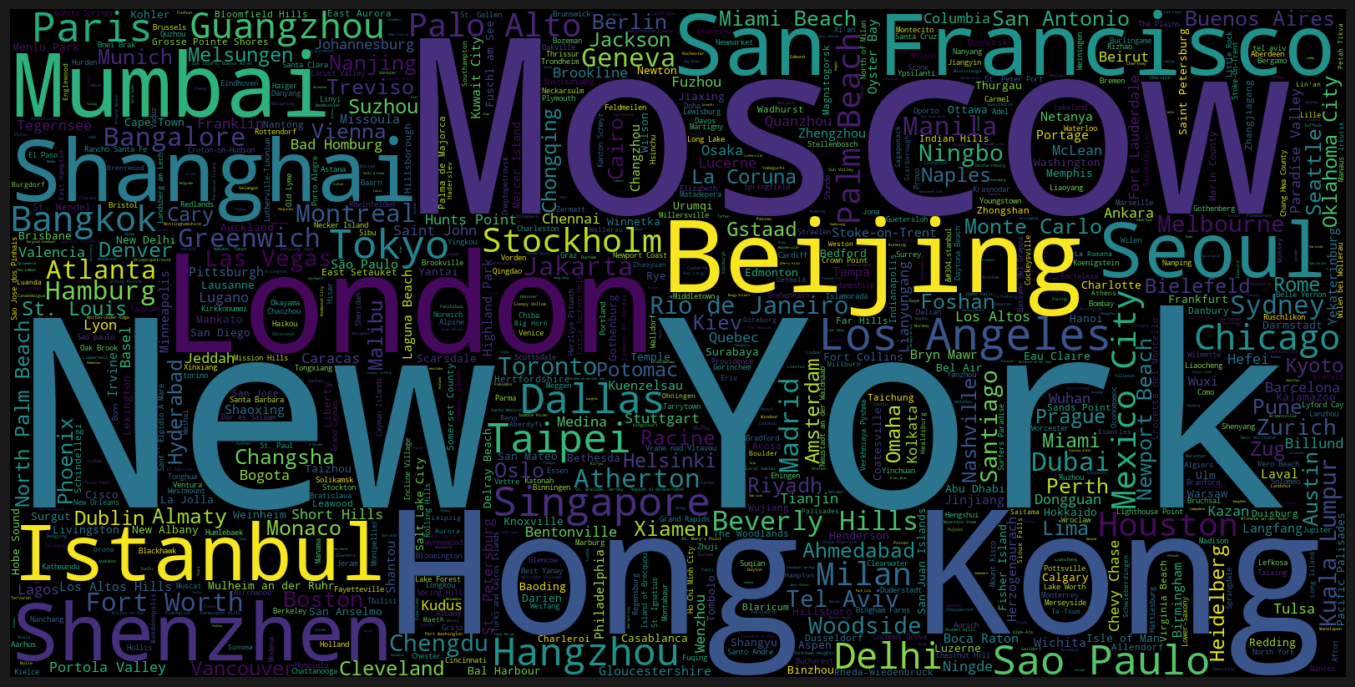

In [44]:
STOPWORDS.add('nan') # To ignore missing values
stop_words_list = list(STOPWORDS)
counts = Counter(df["city_of_residence"].dropna().apply(lambda x:str(x)))
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list)
wcc.generate_from_frequencies(counts)

plt.figure(figsize=(16,7), facecolor='k')
plt.imshow(wcc,interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [47]:
counts

Counter({'Entrepreneur': 561,
         'Chairman': 510,
         'Chairman and CEO': 447,
         'Founder': 438,
         'Investor': 415,
         'CEO': 274,
         'Cofounder': 136,
         'President': 93,
         'Owner': 87,
         'Chief Executive Officer': 75,
         'Founder and Chairman': 68,
         'Director': 63,
         'Investor, Philanthropist': 62,
         'Founder and CEO': 56,
         'Executive Chairman': 49,
         'Philanthropist': 48,
         'Cofounder and CEO': 41,
         'Co-Chairman': 39,
         'President and Chairman': 32,
         'Co-Chief Executive Officer and Co-founder': 30,
         'Former Chairman': 29,
         'Partner': 28,
         'Cofounder and Chairman': 27,
         'Chairman Emeritus': 26,
         'COO': 26,
         'Chairman and Founder': 24,
         'Founder, CEO': 23,
         'Athlete': 22,
         'Co-Founder': 21,
         'Founder and Executive Chairman': 21,
         'Entrepreneur, Investor': 21,
         'C

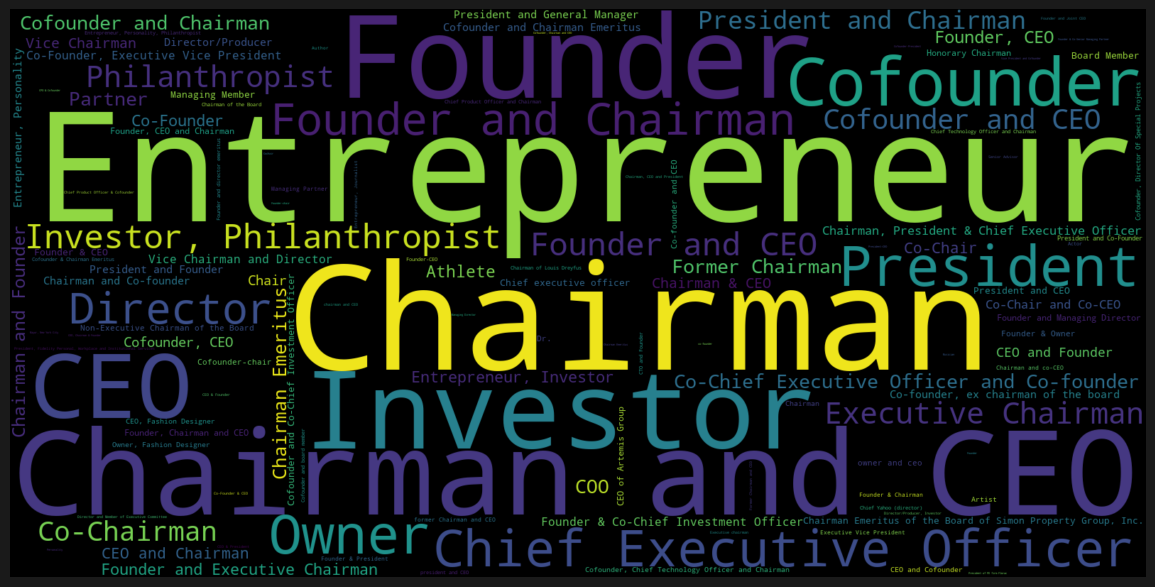

In [48]:
STOPWORDS.add('nan') # To ignore missing values
stop_words_list = list(STOPWORDS)
counts = Counter(df["position_in_organization"].dropna().apply(lambda x:str(x)))
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list)
wcc.generate_from_frequencies(counts)

plt.figure(figsize=(14,6), facecolor='k')
plt.imshow(wcc,interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

## Comparision between [2017 to 2023] data to [1997 to 2023] of missing values.

In [4]:
df_1997_2023 = pd.read_csv(r'artifacts/ForbesBillionaires-dataset/all_billionaires_1997_2023.csv')
df_2017_2023 = pd.read_csv(r'artifacts/ForbesBillionaires-dataset/all_billionaires_2017_2023.csv')

<Axes: >

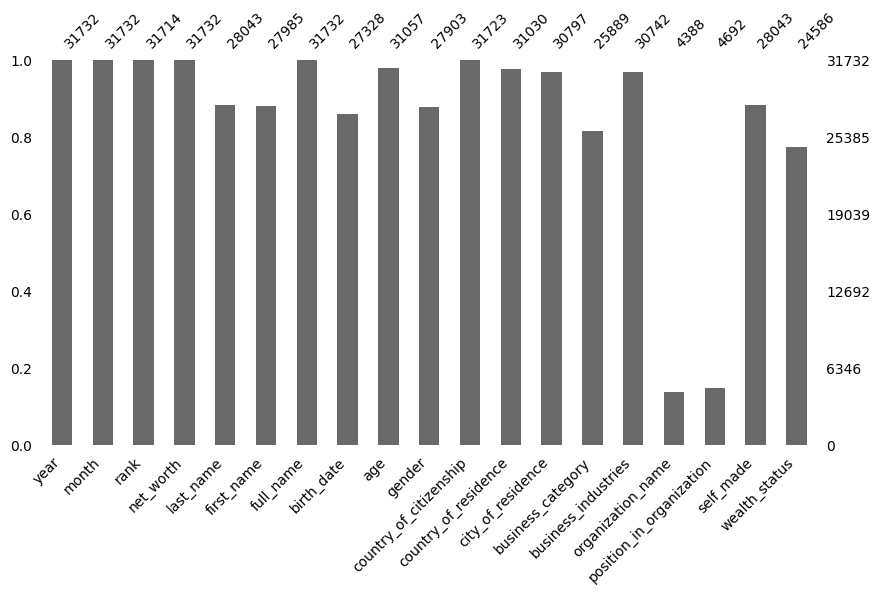

In [20]:
# plt.subplots(nrows=1,ncols=2,figsize = (12,6))
# plt.subplot(1,2,1)
msno.bar(df_1997_2023,figsize=(10,5),fontsize=10)
# plt.subplot(1,2,2)

<Axes: >

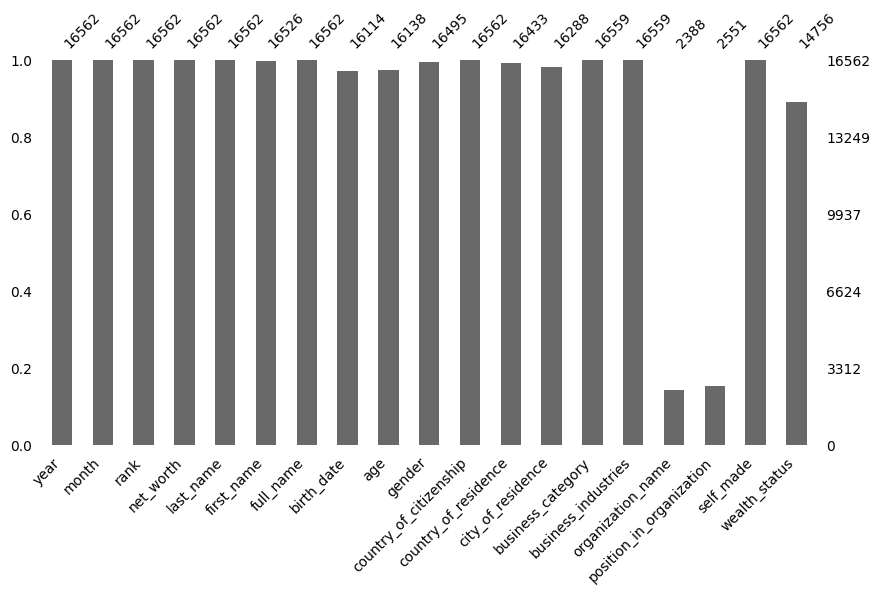

In [21]:
msno.bar(df_2017_2023,figsize=(10,5),fontsize=10)


<Axes: >

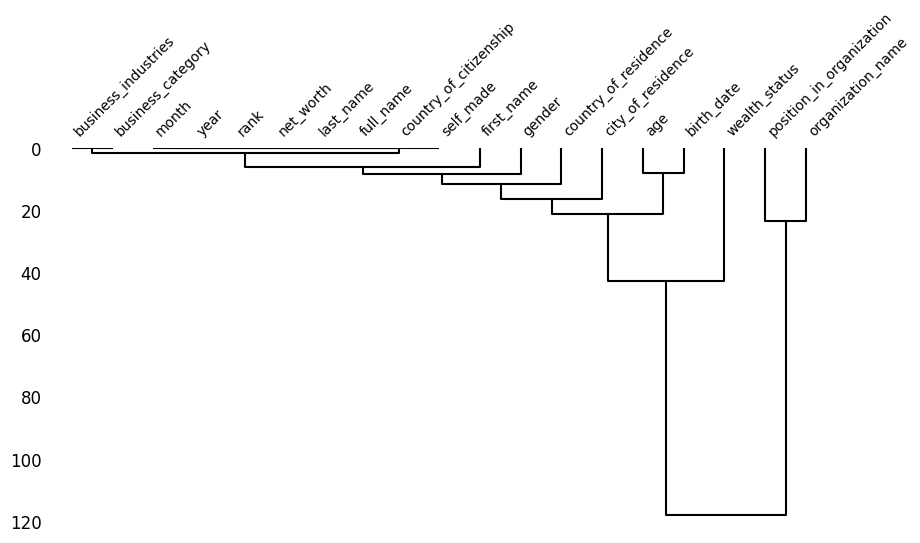

In [22]:
msno.dendrogram(df_2017_2023,figsize=(10,5),fontsize=10)


In [5]:
df_1997_2023

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31727,2023,4,2540.0,1.0 B,Yu,Rong,Yu Rong,1971-12-14,51.0,Male,China,China,Shanghai,Healthcare,['Healthcare'],NaN,NaN,True,Decreased
31728,2023,4,2540.0,1.0 B,Yuengling,Richard,"Richard Yuengling, Jr.",1943-03-10,80.0,Male,United States,United States,Pottsville,Food & Beverage,['Food & Beverage'],NaN,NaN,False,Remained Even
31729,2023,4,2540.0,1.0 B,Zhang,Gongyun,Zhang Gongyun,1962-12-18,60.0,Male,China,China,Gaomi,Manufacturing,['Manufacturing'],NaN,NaN,True,Returned to List
31730,2023,4,2540.0,1.0 B,Zhang,Guiping,Zhang Guiping & family,1951-08-21,71.0,Male,China,China,Nanjing,Real Estate,['Real Estate'],NaN,NaN,True,Decreased


In [27]:
df_2017_2023['rank'].value_counts().count

<bound method Series.count of rank
1818    234
1513    166
2524    150
1929    147
2378    146
       ... 
125       2
131       2
134       2
255       1
168       1
Name: count, Length: 606, dtype: int64>

<Axes: xlabel='rank'>

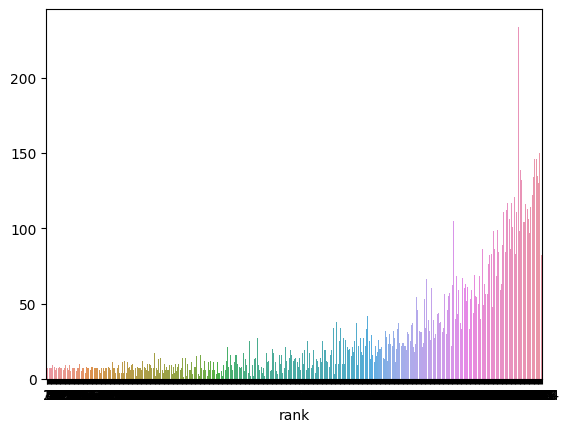

In [34]:
sns.barplot(x=df_2017_2023['rank'].value_counts().index,y=df_2017_2023['rank'].value_counts().values)

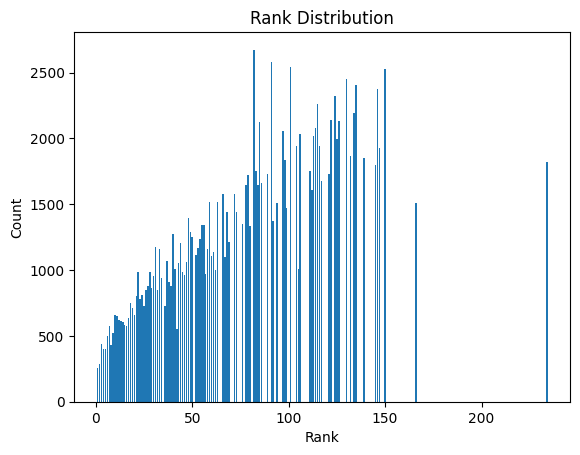

In [38]:
counts = df_2017_2023['rank'].value_counts()

plt.bar(counts.values, counts.index)
plt.xlabel('Rank')
plt.ylabel('Count')
plt.title('Rank Distribution')

plt.show()

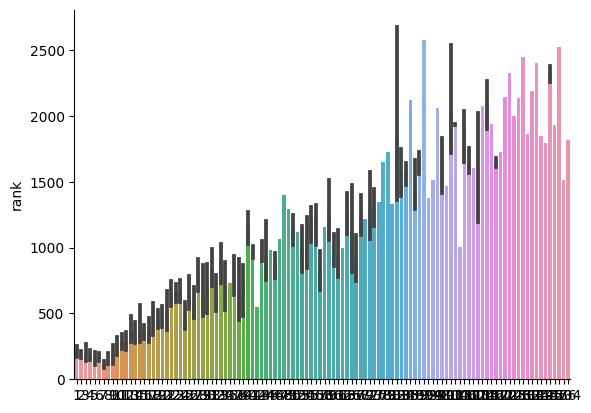

In [32]:
counts = df_2017_2023['rank'].value_counts()

sns.barplot(y=counts.index, x=counts.values)

# sns.set(xlabel='Rank', ylabel='Count', title='Rank Value Counts')

sns.despine()